# Plotting results

## preperation 

In [12]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from src.eval_helper import load_everything
from src.eval_helper import *
from src.plot import plot_two
import numpy as np
import torch



## Plotting

### Prepearing Plot 

In [14]:
from src.eval_helper import standart_deviation
def add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,output_l,calculate_stdv = False):
    print("Processing")
    losses, val_accs, elapsed,train_acc,train_acc_complete,val_acc_complete,test_acc_complete, _   = load_everything(path,name,load_model = False)
    #step_losses = losses
    #all_perplex = train_acc
    x_labels, y_labels = prep_func_1(losses,epoch)
    first_graphs.append((label+" losses",x_labels,y_labels))
    
    if calculate_stdv :
        result = standart_deviation(losses,window)
    else:
        result = None
    x_labels, y_labels = prep_func_2(train_acc,epoch)
    second_graphs.append((label+" Train Acc",x_labels,y_labels))

    x_labels, y_labels = prep_func_2(val_accs,epoch)
    second_graphs.append((label+" Val Acc",x_labels,y_labels))
    output_l.append(f"[{label}] Time {round(elapsed,2)}, train_acc={round(train_acc_complete*100,2)}% val_acc={round(val_acc_complete*100,2)}% test_acc={round(test_acc_complete*100,2)}%")
    return result

#def add_to_list(path,name,prep_func_1,prep_func_2, label,first_graphs,second_graphs,epoch 

In [15]:
#path_to_lora path_to_partial path_to_head_only  path_to_full 
train_run_label = "lora_ep6_saveUpdate2_secondRUn"
load_model = False
losses, val_accs, elapsed,train_acc,train_acc_complete,val_acc_complete,test_acc_complete, model = load_everything(path_to_lora,train_run_label,load_model =load_model)


In [16]:
from src.plot import plot_multiple, get_prep_func
from src.plot import plot_multiple, get_prep_func
import numpy as np
window = 0#200 
prep_func_1  = get_prep_func(0,None)#window)#window)
prep_func_2  = get_prep_func(0,None)
first_graphs = []
second_graphs = []
output_l = []
std_dev = []
calculate_stdv = False

path = path_to_lora
name = "lora_ep6_saveUpdate2_secondRUn"
label = "Lora 6 Epoch"
epoch = 6
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,output_l,calculate_stdv=calculate_stdv))



path = path_to_full
name = "full_second_run_6ep_saveUpdate"
label = "Full Fine Tuning 6 Epoch"
epoch = 6
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,output_l,calculate_stdv=calculate_stdv))

path = path_to_head_only
name = "headonly_ep12_saveUpdate"
label = "Head Only 11 Epoch"
epoch = 11
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,output_l,calculate_stdv=calculate_stdv))


path =path_to_partial
name = "partial_ep12_saveUpdate"
epoch = 12
label = "Partial ep 12"
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,output_l,calculate_stdv=calculate_stdv))


path = path_to_no_pre
name = "noPre_ep10"
epoch = 10
label = "No Pretraining ep 10"
std_dev.append(add_to_lists(path,name,prep_func_1,prep_func_2,label,first_graphs,second_graphs,epoch,window,output_l,calculate_stdv=calculate_stdv))



#print("Average std dev: ",np.mean(std_dev))

Processing
Processing
Processing
Processing
Processing


### Plot 

[Lora 6 Epoch] Time 905.94, train_acc=84.83% val_acc=84.83% test_acc=84.82%
[Full Fine Tuning 6 Epoch] Time 2741.62, train_acc=99.34% val_acc=94.0% test_acc=89.79%
[Head Only 11 Epoch] Time 39.54, train_acc=81.07% val_acc=81.41% test_acc=82.34%
[Partial ep 12] Time 31.82, train_acc=81.0% val_acc=80.99% test_acc=81.65%
[No Pretraining ep 10] Time 2655.39, train_acc=99.79% val_acc=89.17% test_acc=78.44%


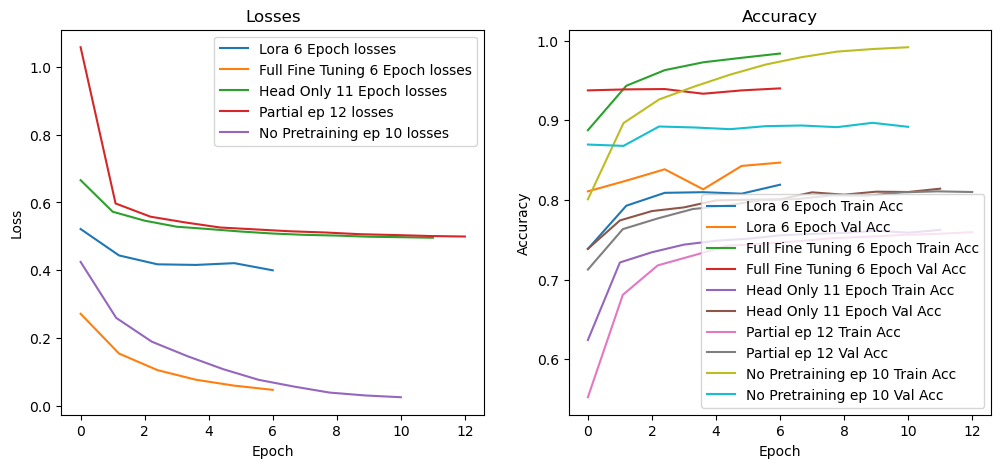

In [19]:
from src.plot import plot_multiple, get_prep_func
for x in output_l:
    print(x)
plot_multiple(first_graphs,"Losses",second_graphs,"Accuracy",
              axLabel1 = None, axLabel2 = ("Epoch","Accuracy"),save = True)



## Prompting

### Preperation 

In [7]:
from transformers import GPT2Tokenizer
from src.eval_helper import *
model_name = "gpt2"
DEBUG = False
# Load GPT-2 Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if DEBUG:
    device = "cpu"
print(f"Using device: {device}")


Using device: cuda


### Head Only

In [8]:
from src.eval_helper import classify_all
path = path_to_head_only
name = "headonly_ep12_saveUpdate"
is_pad_token_eos = False
classify_all(path, name, is_pad_token_eos)

2025-01-18 14:29:55.547447: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-18 14:29:55.562933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737206995.584792  154215 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737206995.591537  154215 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-18 14:29:55.614038: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

P  Exp: P Is correct: Yes => A thrilling and suspenseful movie!
N  Exp: N Is correct: Yes => Completely boring.
P  Exp: P Is correct: Yes => A must-watch for anyone.
N  Exp: N Is correct: Yes => A waste of time and money.
P  Exp: P Is correct: Yes => Heartwarming and delightful.
N  Exp: N Is correct: Yes => Avoid this at all costs. 
P  Exp: P Is correct: Yes => An amazing performance.
N  Exp: N Is correct: Yes => Terrible in every way. 
P  Exp: P Is correct: Yes => Beautifully directed. 
N  Exp: N Is correct: Yes => It lacked any sense of fun.
In Total  10 / 10 where correct



P  Exp: P Is correct: Yes => Not bad at all.
N  Exp: N Is correct: Yes => It could have been better.
P  Exp: P Is correct: Yes => An interesting mix of good and bad moments.
N  Exp: N Is correct: Yes => The film tries hard but ultimately fails.
P  Exp: P Is correct: Yes => Leaves the audience wanting more.
N  Exp: N Is correct: Yes => Some scenes are great, others fall flat. 
N  Exp: N Is correct: Yes => The act

### Partial 

In [9]:
from src.eval_helper import classify_all
path =path_to_partial
name = "partial_ep12_saveUpdate"
is_pad_token_eos = False
classify_all(path, name, is_pad_token_eos)

P  Exp: P Is correct: Yes => A thrilling and suspenseful movie!
N  Exp: N Is correct: Yes => Completely boring.
P  Exp: P Is correct: Yes => A must-watch for anyone.
N  Exp: N Is correct: Yes => A waste of time and money.
P  Exp: P Is correct: Yes => Heartwarming and delightful.
N  Exp: N Is correct: Yes => Avoid this at all costs. 
P  Exp: P Is correct: Yes => An amazing performance.
N  Exp: N Is correct: Yes => Terrible in every way. 
P  Exp: P Is correct: Yes => Beautifully directed. 
N  Exp: N Is correct: Yes => It lacked any sense of fun.
In Total  10 / 10 where correct



P  Exp: P Is correct: Yes => Not bad at all.
N  Exp: N Is correct: Yes => It could have been better.
P  Exp: P Is correct: Yes => An interesting mix of good and bad moments.
N  Exp: N Is correct: Yes => The film tries hard but ultimately fails.
P  Exp: P Is correct: Yes => Leaves the audience wanting more.
N  Exp: N Is correct: Yes => Some scenes are great, others fall flat. 
N  Exp: N Is correct: Yes => The act

### Loara

In [10]:
from src.eval_helper import classify_all
path = path_to_lora
name = "lora_ep6_saveUpdate2_secondRUn"
is_pad_token_eos = True
classify_all(path, name, is_pad_token_eos)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


P  Exp: P Is correct: Yes => A thrilling and suspenseful movie!
P  Exp: N Is correct: No  => Completely boring.
P  Exp: P Is correct: Yes => A must-watch for anyone.
N  Exp: N Is correct: Yes => A waste of time and money.
P  Exp: P Is correct: Yes => Heartwarming and delightful.
N  Exp: N Is correct: Yes => Avoid this at all costs. 
P  Exp: P Is correct: Yes => An amazing performance.
N  Exp: N Is correct: Yes => Terrible in every way. 
P  Exp: P Is correct: Yes => Beautifully directed. 
N  Exp: N Is correct: Yes => It lacked any sense of fun.
In Total  9 / 10 where correct



N  Exp: P Is correct: No  => Not bad at all.
N  Exp: N Is correct: Yes => It could have been better.
N  Exp: P Is correct: No  => An interesting mix of good and bad moments.
N  Exp: N Is correct: Yes => The film tries hard but ultimately fails.
N  Exp: P Is correct: No  => Leaves the audience wanting more.
N  Exp: N Is correct: Yes => Some scenes are great, others fall flat. 
N  Exp: N Is correct: Yes => The acti

### Full Fine Tune

In [11]:
from src.eval_helper import classify_all

path = path_to_full
name = "full_second_run_6ep_saveUpdate"
is_pad_token_eos = True
classify_all(path, name, is_pad_token_eos)

P  Exp: P Is correct: Yes => A thrilling and suspenseful movie!
N  Exp: N Is correct: Yes => Completely boring.
P  Exp: P Is correct: Yes => A must-watch for anyone.
N  Exp: N Is correct: Yes => A waste of time and money.
P  Exp: P Is correct: Yes => Heartwarming and delightful.
N  Exp: N Is correct: Yes => Avoid this at all costs. 
P  Exp: P Is correct: Yes => An amazing performance.
N  Exp: N Is correct: Yes => Terrible in every way. 
P  Exp: P Is correct: Yes => Beautifully directed. 
N  Exp: N Is correct: Yes => It lacked any sense of fun.
In Total  10 / 10 where correct



P  Exp: P Is correct: Yes => Not bad at all.
N  Exp: N Is correct: Yes => It could have been better.
P  Exp: P Is correct: Yes => An interesting mix of good and bad moments.
N  Exp: N Is correct: Yes => The film tries hard but ultimately fails.
P  Exp: P Is correct: Yes => Leaves the audience wanting more.
N  Exp: N Is correct: Yes => Some scenes are great, others fall flat. 
N  Exp: N Is correct: Yes => The act

## No Pretraining

In [9]:
from src.eval_helper import classify_all


path = path_to_no_pre
name = "noPre_ep10"
is_pad_token_eos = True
classify_all(path, name, is_pad_token_eos)

2025-01-22 16:56:57.506689: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-22 16:56:58.030117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737561418.220613  132654 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737561418.260712  132654 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 16:56:58.740376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

P  Exp: P Is correct: Yes => A thrilling and suspenseful movie!
N  Exp: N Is correct: Yes => Completely boring.
N  Exp: P Is correct: No  => A must-watch for anyone.
N  Exp: N Is correct: Yes => A waste of time and money.
P  Exp: P Is correct: Yes => Heartwarming and delightful.
N  Exp: N Is correct: Yes => Avoid this at all costs. 
P  Exp: P Is correct: Yes => An amazing performance.
N  Exp: N Is correct: Yes => Terrible in every way. 
P  Exp: P Is correct: Yes => Beautifully directed. 
N  Exp: N Is correct: Yes => It lacked any sense of fun.
In Total  9 / 10 where correct



N  Exp: P Is correct: No  => Not bad at all.
N  Exp: N Is correct: Yes => It could have been better.
P  Exp: P Is correct: Yes => An interesting mix of good and bad moments.
N  Exp: N Is correct: Yes => The film tries hard but ultimately fails.
N  Exp: P Is correct: No  => Leaves the audience wanting more.
P  Exp: N Is correct: No  => Some scenes are great, others fall flat. 
P  Exp: N Is correct: No  => The acti